In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.3'

In [4]:
keras.__version__

'2.3.0-tf'

# Data 가져오기
- fashion_mnist는 keras에 내장되어 있음 ```x,y=keras.datasets.fashion_mnist.load_data()```
- 이미지 데이터 시각화 하는 법 ```plt.imshow(X_train[idx],cmap='binary', interpolation='nearest')```

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

그림 저장: fashion_mnist_plot


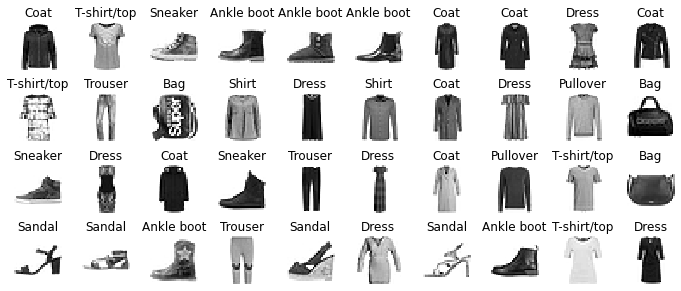

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# 기본 모델
- Sequential로 시작: ```model=keras.models.Sequential()```
- 층 쌓기: ```model.add(...)```
- 층 만들기: ```model.add(keras.layers.Flatten/Dense)```
    - ```keras.layers.Flatten(input_shape=[])```
    - ```kears.layers.Dense(n_neurons, activation='')```  
    

- ```model = keras.models.Sequential([keras.layers.Flatten, keras.layers.Dense.....])```형태도 가능

In [7]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
#또다른 가능한 형태

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 모델의 상태 확인
- ```model.summary()```: layer의 종류, 결과형태, 파라미터 개수가 위에서부터 순서대로 나온다 
- ```keras.utils.plot_model(model, "img_name", show_shapes=True```: 그림으로 표현해준다. 
- 레이어 객체: ```model.layers[idx]```
    - 레이어 객체.get_weights(): ```weights,biases=layer.get_weights()``` 이것은 weight과 bias를 리턴해준다.

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


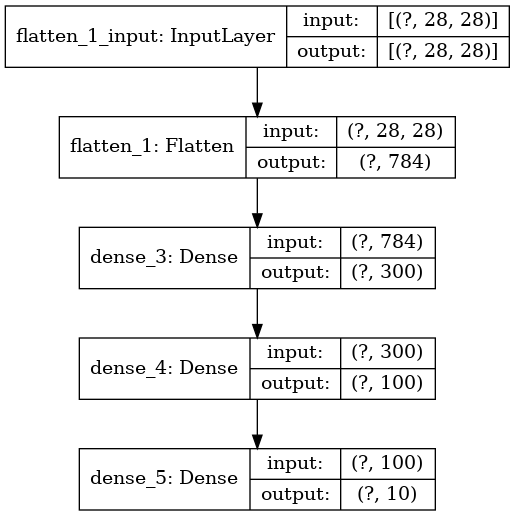

In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [14]:
hidden1 = model.layers[1]
print(type(hidden1))
weights, biases = hidden1.get_weights()
print(weights.shape,biases.shape)

<class 'tensorflow.python.keras.layers.core.Dense'>
(784, 300) (300,)


# 컴파일 (손실 함수, 옵티마이저, 스코어의 metric)
- 손실함수 loss
- 옵티마이저 optimizer
- metric

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 학습하기
- ```model.fit(x, y, epochs, validation_date=(x,y))```

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

[2021-11-26 07:14:11.040 ip-172-16-7-116:8827 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-26 07:14:11.101 ip-172-16-7-116:8827 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.7016 - accuracy: 0.7696 - val_loss: 0.5045 - val_accuracy: 0.8254
Epoch 2/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4855 - accuracy: 0.8304 - val_loss: 0.4585 - val_accuracy: 0.8442
Epoch 3/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4447 - accuracy: 0.8437 - val_loss: 0.4271 - val_accuracy: 0.8560
Epoch 4/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.4168 - accuracy: 0.8532 - val_loss: 0.4173 - val_accuracy: 0.8578
Epoch 5/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.

#  결과 확인(history=fit())
- history.params: 배치사이즈, epochs수, steps, 샘플, metric등...
- history.epoch
- history.history: 딕셔너리인데, 각 metric별로 epoch별 수치가 나와있다
    - ```pd.DataFrame(history.history).plot(figsize=(8, 5))``` 로 각 metric별로 그림그릴수있음

{'batch_size': 32, 'epochs': 30, 'steps': 1719, 'samples': 55000, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.7015964212157509, 0.48550753785480155, 0.44465372821634463, 0.41683440468528055, 0.39662959573485634, 0.3810698943831704, 0.3660658258221366, 0.3553577314940366, 0.34551171402064235, 0.3357555570038882, 0.3270183016235178, 0.31817874813079833, 0.3100907682982358, 0.3042232666232369, 0.2975941429788416, 0.2919939168843356, 0.2861615558841012, 0.28057205494100396, 0.2750878570578315, 0.27051353825222363, 0.26603912923661144, 0.26041392413919623, 0.2563895548170263, 0.25258665535016495, 0.24832973628044128, 0.24378402700424195, 0.2398657721356912, 0.23491913438276812, 0.2317386815027757, 0.22926811029044064], 'accuracy': [0.7695818, 0.83036363, 0.84369093, 0.8532182, 0.8606, 0.86676365, 0.8715636, 0.8749091

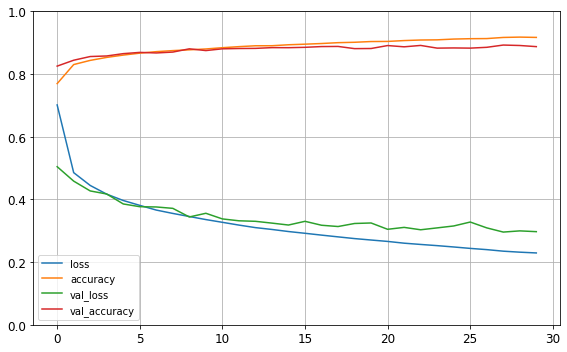

In [18]:
# history
print(history.params)
print(history.epoch)
print(history.history)
history.history.keys()
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

# 테스트 셋으로 검증하기

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3314 - accuracy: 0.8794


[0.3314358287155628, 0.8794]

# 예측하기
- ```model.predict(X_new)```
- 각 클래스별로 확률 값이 나오는 경우, np.argmax를 쓰면된다.

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])